In [2]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing necessary package to perform EDA

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [185]:
datetime.now()

datetime.datetime(2023, 6, 11, 14, 56, 15, 257256)

# Fetching Data for required timeline from yahoo finance

In [186]:
start_date = '2019-01-01'
end_date = '2023-05-01'

In [187]:
df = yf.download('GE',start_date , end_date)

[*********************100%***********************]  1 of 1 completed


In [188]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,44.796734,49.120277,44.496487,48.339638,47.503754,21541338
2019-01-03,48.159492,49.240376,46.718307,48.399689,47.562767,20474697
2019-01-04,49.180328,49.600674,47.919292,49.420525,48.565945,19997555
2019-01-07,51.342102,52.783283,49.780819,52.483036,51.575497,29922843
2019-01-08,53.503872,54.284512,51.161953,51.402149,50.513306,24476646


In [189]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Value of GE Adj Close price variation across 2019 - 2023

<Axes: xlabel='Date'>

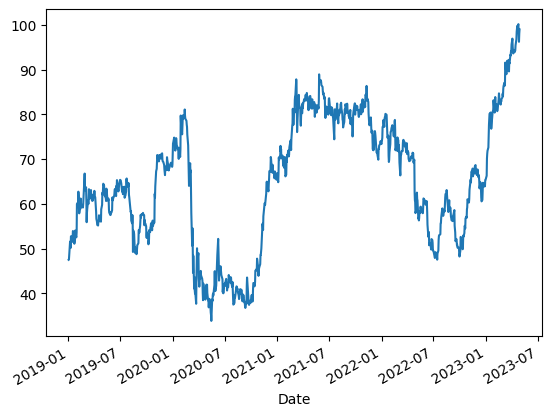

In [190]:
df['Adj Close'].plot()    

# Variation of GE Adj Close Price in year 2023

<Axes: xlabel='Date'>

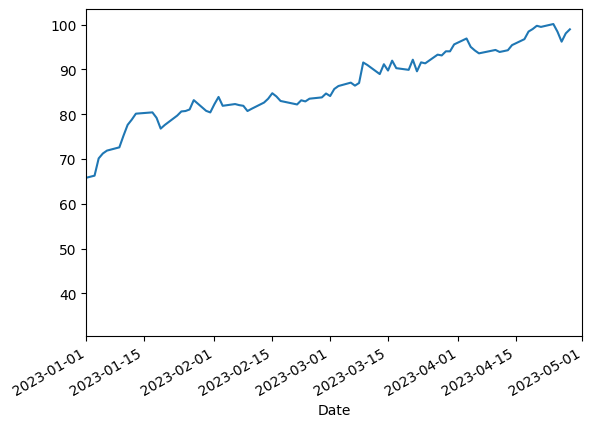

In [191]:
df['Adj Close'].plot(xlim = ('2023-01-01','2023-05-01'))

**Insights form above plot:**

*   There is huge variation in adj price of stocks from 2019-2013 
*   For above time range adj value of stock is lowest between 2020 - 2021 ---> Covid 19 could be reason

*   For year 2023 Stock is performing well with uptrend and is at all time high value within above timeframe
*   From above chart we can see that stock value are not stationary their is seasonal component in it





In [192]:
mean_adj_close_ye = pd.DataFrame(df['Adj Close'].resample('A').mean())
mean_adj_close_ye

,Adj Close
Date,
2019-12-31,60.142703
2020-12-31,50.813372
2021-12-31,79.156454
2022-12-31,62.747719
2023-12-31,86.806926


<Axes: xlabel='Date'>

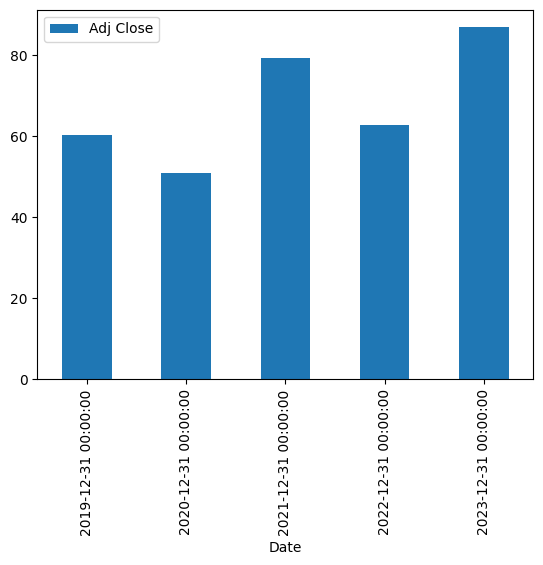

In [193]:
mean_adj_close_ye.plot(kind = 'bar')

#  **Insights**

*   From above chart we can see that mean adj close price for stock is highest for financial year of 2023
*   Adj close price was mininum for finincial year of 2020 in above time range

# Mean Adj Close Price w.r.t Months form 2019-2023

In [194]:
mean_adj_close_ms = pd.DataFrame(df['Adj Close'].resample('MS').mean()).reset_index()
mean_adj_close_ms['Month'] = mean_adj_close_ms['Date'].dt.month
mean_adj_close_ms.head()

,Date,Adj Close,Month
0,2019-01-01,52.056018,1
1,2019-02-01,60.979099,2
2,2019-03-01,61.216325,3
3,2019-04-01,58.399606,4
4,2019-05-01,61.070492,5


In [195]:
mean_adj_close_ms = mean_adj_close_ms.groupby('Month')['Adj Close'].mean().sort_values(ascending = False).reset_index()
mean_adj_close_ms.head()

,Month,Adj Close
0,2,73.685274
1,3,71.033257
2,1,69.701339
3,4,69.651804
4,11,68.230977


In [196]:
mean_adj_close_ms.tail()

,Month,Adj Close
7,5,60.261106
8,7,59.301355
9,8,58.452219
10,10,58.348396
11,9,56.945181


<BarContainer object of 12 artists>

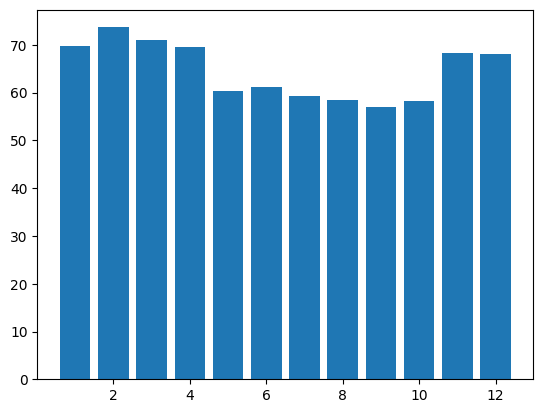

In [197]:
plt.bar(mean_adj_close_ms['Month'],mean_adj_close_ms['Adj Close'])

# **Insights:**

From above chart we can say that mean adj close price for stock is maximum in feb and minimum in Sept.

# Simple Moving Average for 30 days

In [198]:
df['adj_close_Smm_30days'] = df['Adj Close'].rolling(window = 30 , min_periods = 1).mean()

In [199]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,adj_close_Smm_30days
Date,,,,,,,
2019-01-02,44.796734,49.120277,44.496487,48.339638,47.503754,21541338,47.503754
2019-01-03,48.159492,49.240376,46.718307,48.399689,47.562767,20474697,47.533260
2019-01-04,49.180328,49.600674,47.919292,49.420525,48.565945,19997555,47.877488
2019-01-07,51.342102,52.783283,49.780819,52.483036,51.575497,29922843,48.801991
2019-01-08,53.503872,54.284512,51.161953,51.402149,50.513306,24476646,49.144254


In [200]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,adj_close_Smm_30days
Date,,,,,,,
2023-04-24,99.580002,100.769997,99.580002,100.150002,100.150002,6251800,94.086333
2023-04-25,101.949997,102.010002,97.550003,98.440002,98.440002,9297500,94.402000
2023-04-26,98.230003,98.449997,96.089996,96.209999,96.209999,6410500,94.570000
2023-04-27,97.019997,98.190002,96.599998,98.059998,98.059998,7461000,94.846667
2023-04-28,97.129997,99.720001,96.879997,98.970001,98.970001,5010800,95.080000


# Simple Moving Average for 10 days

In [201]:
df['adj_close_Smm_10days'] = df['Adj Close'].rolling(window = 10 , min_periods = 1).mean()

In [202]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,adj_close_Smm_30days,adj_close_Smm_10days
Date,,,,,,,,
2019-01-02,44.796734,49.120277,44.496487,48.339638,47.503754,21541338,47.503754,47.503754
2019-01-03,48.159492,49.240376,46.718307,48.399689,47.562767,20474697,47.533260,47.533260
2019-01-04,49.180328,49.600674,47.919292,49.420525,48.565945,19997555,47.877488,47.877488
2019-01-07,51.342102,52.783283,49.780819,52.483036,51.575497,29922843,48.801991,48.801991
2019-01-08,53.503872,54.284512,51.161953,51.402149,50.513306,24476646,49.144254,49.144254


#Cumulative Moving Average

In [203]:
df['adj_close_Cmm'] = df['Adj Close'].expanding().mean()

In [204]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,adj_close_Smm_30days,adj_close_Smm_10days,adj_close_Cmm
Date,,,,,,,,,
2019-01-02,44.796734,49.120277,44.496487,48.339638,47.503754,21541338,47.503754,47.503754,47.503754
2019-01-03,48.159492,49.240376,46.718307,48.399689,47.562767,20474697,47.533260,47.533260,47.533260
2019-01-04,49.180328,49.600674,47.919292,49.420525,48.565945,19997555,47.877488,47.877488,47.877488
2019-01-07,51.342102,52.783283,49.780819,52.483036,51.575497,29922843,48.801991,48.801991,48.801991
2019-01-08,53.503872,54.284512,51.161953,51.402149,50.513306,24476646,49.144254,49.144254,49.144254


# Exponential moving average

In [205]:
df['adj_close_Emm'] = df['Adj Close'].ewm(span = 30).mean()   ## alpha is smoothning factor and its formaula is = 2/(span+1)  , Span is equivalent to window size

In [206]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,adj_close_Smm_30days,adj_close_Smm_10days,adj_close_Cmm,adj_close_Emm
Date,,,,,,,,,,
2019-01-02,44.796734,49.120277,44.496487,48.339638,47.503754,21541338,47.503754,47.503754,47.503754,47.503754
2019-01-03,48.159492,49.240376,46.718307,48.399689,47.562767,20474697,47.533260,47.533260,47.533260,47.534244
2019-01-04,49.180328,49.600674,47.919292,49.420525,48.565945,19997555,47.877488,47.877488,47.877488,47.901317
2019-01-07,51.342102,52.783283,49.780819,52.483036,51.575497,29922843,48.801991,48.801991,48.801991,48.913687
2019-01-08,53.503872,54.284512,51.161953,51.402149,50.513306,24476646,49.144254,49.144254,49.144254,49.277639


In [207]:
df['adj_close_Smm_30day_std'] = df['Adj Close'].rolling(window = 30 , min_periods = 1).std()

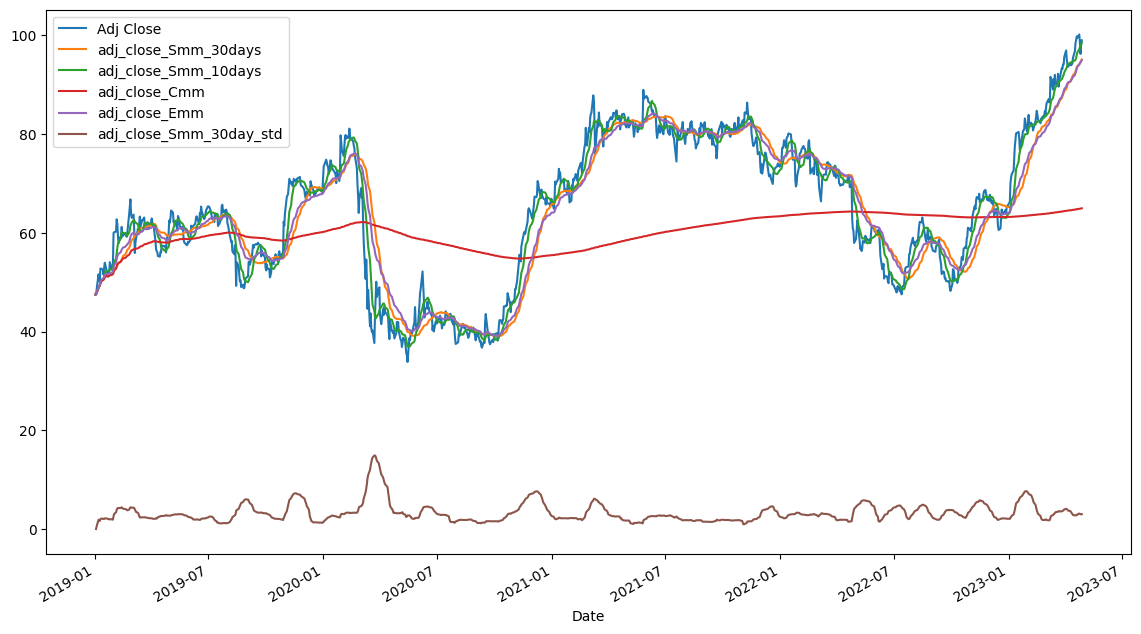

In [208]:
plt.figure(figsize = (14,8))
df['Adj Close'].plot()
df['adj_close_Smm_30days'].plot()
df['adj_close_Smm_10days'].plot()
df['adj_close_Cmm'].plot()
df['adj_close_Emm'].plot()
df['adj_close_Smm_30day_std'].plot()
plt.legend()

From above graph we can see smoothning provided by various parameter which can be used to find support and resistance of stock value

## We can see that our data is not stationary and it is cyclic in nature.So, we will cross verify it with Dicky Fuller Test

#Dicky Fuller Test-----> Stationary Check

In [209]:
import statsmodels.api as sm

In [210]:
decomposition = sm.tsa.seasonal_decompose(df['Adj Close'],model='additive',period = 12)

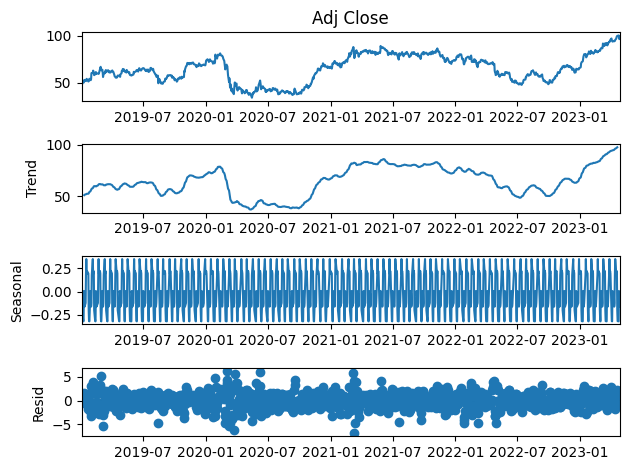

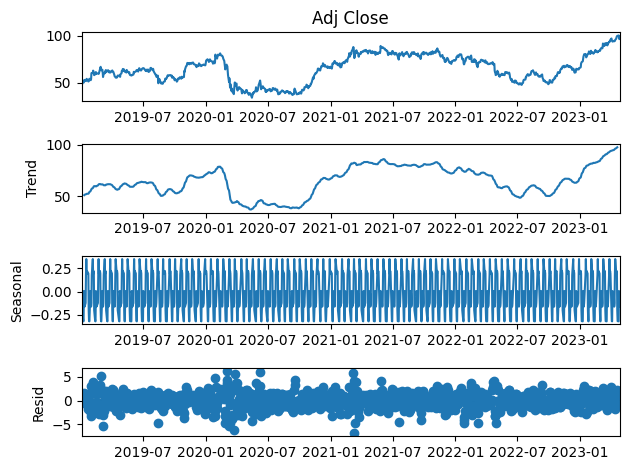

In [211]:
decomposition.plot()

In [212]:
from statsmodels.tsa.stattools import adfuller

In [213]:
adf_test = adfuller(df['Adj Close'])

In [214]:
adf_test[1]   ## we can see that value is greater than 0.5 so we have to difference it to make it stationary

0.5241822108685996

In [215]:
x = df['Adj Close']-df['Adj Close'].shift(1)

In [216]:
x.head()

Date
2019-01-02         NaN
2019-01-03    0.059013
2019-01-04    1.003178
2019-01-07    3.009552
2019-01-08   -1.062191
Name: Adj Close, dtype: float64

<Axes: xlabel='Date'>

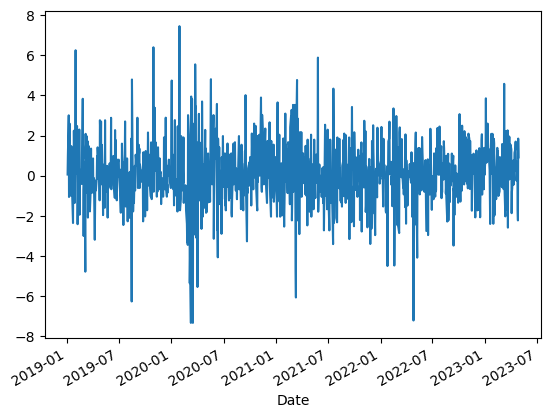

In [217]:
x.plot()           ## Here we can se that our data is stationary so now we can apply arima and sarima model for predection

In [218]:
adf_test1 = adfuller(x.dropna())

In [219]:
adf_test1[1]          # we can see that we get result less than 0.5 so now our data is stationary  (d=1)

1.1249892381972572e-14

In [220]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [221]:
from pmdarima.arima.utils import ndiffs       ## Another way to find d
ndiffs(df['Adj Close'] , test = 'adf')

1

# Getting best P,D,Q value from auto_arima

In [222]:
from pmdarima import auto_arima                                                                       ## p -----> 0    D------->1       Q---------->0
stepwise_fit = auto_arima(df['Adj Close'],trace = True,m=7 ,seasonal = True,suppress_warnings= True)
fitted = stepwise_fit.fit(df['Adj Close'])
fitted.summary()                                                                  ## if data is for day wise take m =7 , for year take m=12

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=4115.916, Time=7.08 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=4114.451, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=4114.464, Time=0.32 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=4114.445, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=4113.401, Time=0.04 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=4112.483, Time=0.23 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=4114.475, Time=0.49 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=4114.461, Time=0.91 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=4112.466, Time=0.47 sec
 ARIMA(0,1,0)(0,0,2)[7] intercept   : AIC=4114.464, Time=1.07 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=4116.463, Time=1.28 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=4114.445, Time=0.63 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=4116.443, Time=0.91 sec
 ARIMA(0,1,0)(0,0,1)[7]             : AIC=4111.323, Time=0.21 sec
 ARIMA(0,1,0)(1,0,1)[7]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1089
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 7)   Log Likelihood               -2053.661
Date:                             Sun, 11 Jun 2023   AIC                           4111.323
Time:                                     14:56:47   BIC                           4121.307
Sample:                                          0   HQIC                          4115.102
                                            - 1089                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L7        0.0615      0.025      2.475      0.013       0.013       0.110
sigma2         2.5528      0.073     34.832      0.000       2.409       2.696
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               294.47
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Spitting Data in Training and Testing

In [223]:
test_size = 0.95
train = df.iloc[:int(len(df)*test_size),0]
test = df.iloc[int(len(df)*test_size):,0]

In [224]:
test.head()

Date
2023-02-09    82.339996
2023-02-10    80.809998
2023-02-13    81.199997
2023-02-14    82.129997
2023-02-15    82.610001
Name: Open, dtype: float64

In [225]:
print(train.shape , test.shape)

(1034,) (55,)


# Building Arima Model

In [226]:
from statsmodels.tsa.arima.model import ARIMA

In [227]:
model = ARIMA(df['Adj Close'] , order = (0,1,0)).fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1089
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2055.701
Date:                Sun, 11 Jun 2023   AIC                           4113.401
Time:                        14:56:47   BIC                           4118.393
Sample:                             0   HQIC                          4115.291
                               - 1089                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.5625      0.072     35.393      0.000       2.421       2.704
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               314.46
Prob(Q):                              0.85   Pr

In [228]:
prediction = model.predict(start = len(train) , end = len(train)+len(test)-1 , typ ='levels')
prediction.index = df.index[len(train):len(train)+len(test)+1]

In [229]:
prediction.head()

Date
2023-02-09    81.884094
2023-02-10    80.715179
2023-02-13    81.214714
2023-02-14    82.603424
2023-02-15    83.462631
Name: predicted_mean, dtype: float64

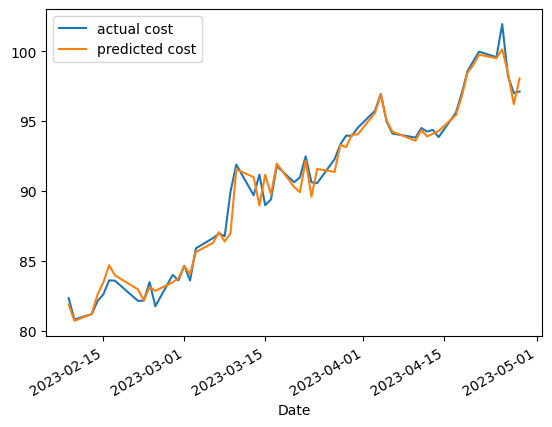

In [230]:
test.plot(label = 'actual cost')
prediction.plot(label = 'predicted cost')
plt.legend()

# Building Sarima model

In [231]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [232]:
model_sm = SARIMAX(df['Adj Close'], order=(0,1,0),seasonal_order = (0,0,1,7)).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           Adj Close   No. Observations:                 1089
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 7)   Log Likelihood               -2053.661
Date:                             Sun, 11 Jun 2023   AIC                           4111.323
Time:                                     14:56:48   BIC                           4121.307
Sample:                                          0   HQIC                          4115.102
                                            - 1089                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L7        0.0615      0.025      2.475      0.013       0.013       0.110
sigma2         2.5528      0.073     34.832      0.000       2.409       2.696
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               294.47
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [233]:
prediction_sm = model_sm.predict(start = len(train) , end = len(train)+len(test)-1)
prediction_sm.index = df.index[len(train):len(train)+len(test)+1]

In [234]:
prediction_sm

Date
2023-02-09     81.860081
2023-02-10     80.820877
2023-02-13     81.310976
2023-02-14     82.481711
2023-02-15     83.485318
2023-02-16     84.668562
2023-02-17     83.971440
2023-02-21     82.892702
2023-02-22     82.208030
2023-02-23     83.192428
2023-02-24     82.923502
2023-02-27     83.546788
2023-02-28     83.719533
2023-03-01     84.569548
2023-03-02     84.018487
2023-03-03     85.696250
2023-03-06     86.279752
2023-03-07     87.093761
2023-03-08     86.403253
2023-03-09     87.036079
2023-03-10     91.528795
2023-03-13     91.099737
2023-03-14     89.007123
2023-03-15     91.217972
2023-03-16     89.716731
2023-03-17     92.005463
2023-03-20     90.568156
2023-03-21     89.887485
2023-03-22     92.049053
2023-03-23     89.722982
2023-03-24     91.500352
2023-03-27     91.508546
2023-03-28     93.204522
2023-03-29     93.100147
2023-03-30     94.200954
2023-03-31     93.898807
2023-04-03     95.714793
2023-04-04     96.911984
2023-04-05     95.160766
2023-04-06     94.24

# Comparison of Arima , Sarima and Actual Cost

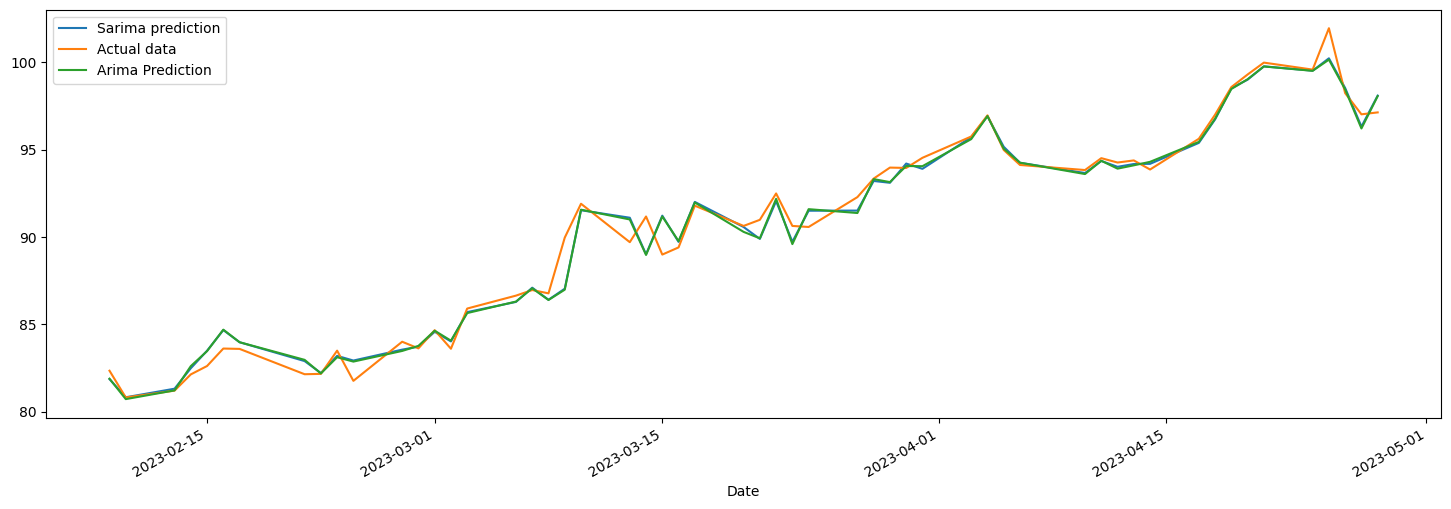

In [235]:
plt.figure(figsize=(18,6))
prediction_sm.plot(label = 'Sarima prediction')
test.plot(label= 'Actual data')
prediction.plot(label = 'Arima Prediction')
plt.legend()

# Prediction

In [236]:
six_day_prediction_arima = model.predict(len(df),len(df)+6)
six_day_prediction_sarima = model_sm.predict(len(df),len(df)+6)

In [237]:
six_day_prediction_sarima

1089    99.016552
1090    99.000858
1091    99.039732
1092    98.929850
1093    98.787497
1094    98.894668
1095    98.948666
Name: predicted_mean, dtype: float64

<Axes: >

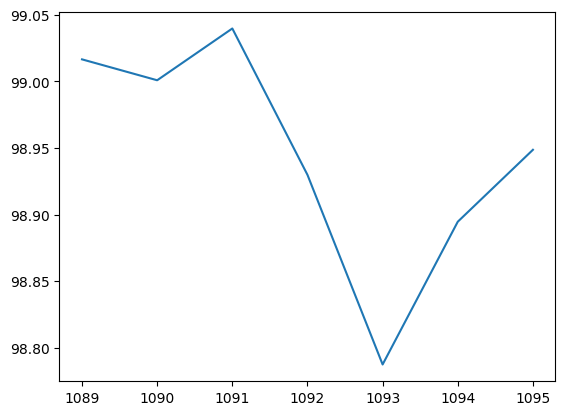

In [238]:
one_year_prediction_sarima.plot()